In [1]:
# Importing modules needed for data analysis.
from scipy.odr import ODR, Model, Data, RealData
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import InterpolatedUnivariateSpline
from scipy import stats
from scipy.stats import norm
from scipy.optimize import curve_fit,fmin
from scipy import signal as ss
from scipy import constants as cs
from pylab import *
import glob

In [2]:
## Function to fix spaces in urls
def url(path):
    path = 'https://gitlab.com/xmoskala/srlab/-/raw/main/BandGap'+path+'.txt'
    path = path.replace(" ", "%20")
    return path



In [3]:
%%capture --no-display
#Read in data from gitlab

Si20 = np.array([pd.read_csv(url("/3_7_23Si20"), skiprows=1, sep='   ').to_numpy().T[0][:-2]*10**(3), pd.read_csv(url("/3_7_23Si20"), skiprows=1, sep='   ').to_numpy().T[1][:-2]])
Si10 = np.array([pd.read_csv(url("/3_2_23Si10"), skiprows=1, sep='   ').to_numpy().T[0][:-2]*10**(3), pd.read_csv(url("/3_2_23Si10"), skiprows=1, sep='   ').to_numpy().T[1][:-2]])
Si0 = np.array([pd.read_csv(url("/3_2_23Si0"), skiprows=1, sep='   ').to_numpy().T[0][:-2]*10**(3), pd.read_csv(url("/3_2_23Si0"), skiprows=1, sep='   ').to_numpy().T[1][:-2]])
Si_10 = np.array([pd.read_csv(url("/3_2_23Si-10"), skiprows=1, sep='   ').to_numpy().T[0][:-2]*10**(3), pd.read_csv(url("/3_2_23Si-10"), skiprows=1, sep='   ').to_numpy().T[1][:-2]])
Si_20 = np.array([pd.read_csv(url("/3_7_23Si-20"), skiprows=1, sep='   ').to_numpy().T[0][:-2]*10**(3), pd.read_csv(url("/3_7_23Si-20"), skiprows=1, sep='   ').to_numpy().T[1][:-2]])

#cuts made due to over-ranging picoammeter
v = 100
v20 = -88
v10 = -41
v0 = -2
v_10 = -67
v_20 = -60

Ge20 = np.array([pd.read_csv(url("/Ge2/3_21_23Ge20"), skiprows=1, sep='  ').to_numpy().T[0][v:v20]*10**(3), pd.read_csv(url("/Ge2/3_21_23Ge20"), skiprows=1, sep='  ').to_numpy().T[1][v:v20]])
Ge10 = np.array([pd.read_csv(url("/Ge2/3_21_23Ge10"), skiprows=1, sep='  ').to_numpy().T[0][v:v10]*10**(3), pd.read_csv(url("/Ge2/3_21_23Ge10"), skiprows=1, sep='  ').to_numpy().T[1][v:v10]])
Ge0 = np.array([pd.read_csv(url("/Ge2/3_21_23Ge0"), skiprows=1, sep='  ').to_numpy().T[0][v:v0]*10**(3), pd.read_csv(url("/Ge2/3_21_23Ge0"), skiprows=1, sep='  ').to_numpy().T[1][v:v0]])
Ge_10 = np.array([pd.read_csv(url("/Ge2/3_21_23Ge_10"), skiprows=1, sep='  ').to_numpy().T[0][v:v_10]*10**(3), pd.read_csv(url("/Ge2/3_21_23Ge_10"), skiprows=1, sep='  ').to_numpy().T[1][v:v_10]])
Ge_20 = np.array([pd.read_csv(url("/Ge2/3_21_23Ge_20"), skiprows=1, sep='  ').to_numpy().T[0][v:v_20]*10**(3), pd.read_csv(url("/Ge2/3_21_23Ge_20"), skiprows=1, sep='  ').to_numpy().T[1][v:v_20]])



In [4]:
#Theory

def current(beta, V):
    I_0,T = beta
    q = cs.physical_constants['elementary charge'][0] #C
    k = cs.physical_constants['Boltzmann constant'][0] #J/K
    return I_0*(np.exp((q*V)/(k*T))-1)


In [5]:
def fit(dat,temp):
    data = RealData(dat[1], dat[0], sx= 0.01*dat[1], sy=0.05*dat[0])
    model = Model(current)

    odr = ODR(data,model, beta0=[10e-6, temp], ifixb=[1,0] )
    
    odr.set_job(fit_type=2)
    output1 = odr.run()
    
    odr.set_job(fit_type=0)
    output2 = odr.run()
    return [output1.beta,output1.sd_beta],[output2.beta,output2.sd_beta]

In [6]:

a,odrSi20 = fit(Si20,293)
a,odrSi10 = fit(Si10,283)
a,odrSi0 = fit(Si0,273)
a,odrSi_10 = fit(Si_10,263)
a,odrSi_20 = fit(Si_20,253)

a,odrGe20 = fit(Ge20,293)
a,odrGe10 = fit(Ge10,283)
a,odrGe0 = fit(Ge0,273)
a,odrGe_10 = fit(Ge_10,263)
a,odrGe_20 = fit(Ge_20,253)




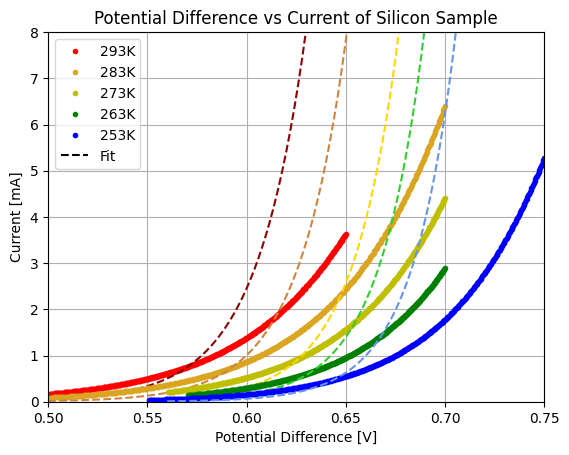

In [7]:

fig, ax = plt.subplots()
plt.plot(Si20[1],Si20[0],'r.',label='293K')
x = np.arange(0.5,0.65,0.001)
plt.plot(x,current(odrSi20[0],x),'--',color='darkred')

plt.plot(Si10[1],Si10[0],color='goldenrod',ls='',marker='.',label='283K')
x = np.arange(0.5,0.67,0.001)
plt.plot(x,current(odrSi10[0],x),'--', color='peru')

plt.plot(Si0[1],Si0[0],'y.',label='273K')
x = np.arange(0.56,0.695,0.001)
plt.plot(x,current(odrSi0[0],x),'--', color='gold')

plt.plot(Si_10[1],Si_10[0],'g.',label='263K')
x = np.arange(0.56,0.707,0.001)
plt.plot(x,current(odrSi_10[0],x),'--', color='limegreen')

plt.plot(Si_20[1],Si_20[0],'b.',label='253K')
x = np.arange(0.56,0.7213,0.001)
plt.plot(x,current(odrSi_20[0],x),'--', color='cornflowerblue')

ax.axhline(-1,ls='--',color='k',label='Fit')

ax.set(xlabel='Potential Difference [V]', ylabel='Current [mA]',
       title='Potential Difference vs Current of Silicon Sample')
ax.grid()
ax.legend()

plt.xlim(0.5,0.75)
plt.ylim(0,8)

plt.savefig("SI_ivA.png", format="png", dpi=1000)

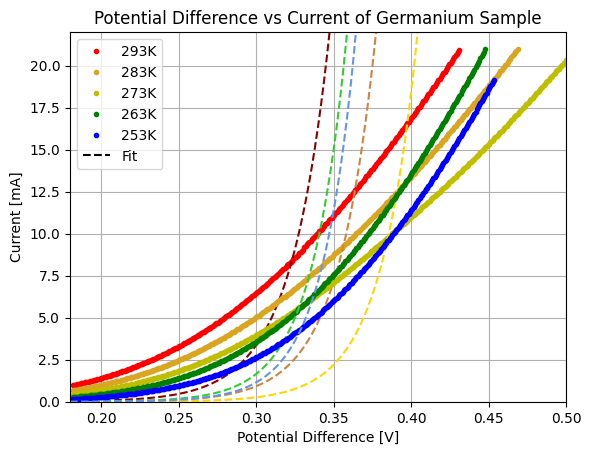

In [8]:


fig, ax = plt.subplots()
ax.set(xlabel='Potential Difference [V]', ylabel='Current [mA]',
       title='Potential Difference vs Current of Germanium Sample')
ax.grid()

plt.plot(Ge20[1],Ge20[0],'r.',label='293K')
x = np.arange(0.18,0.4,0.001)
plt.plot(x,current(odrGe20[0],x),'--',color='darkred')

plt.plot(Ge10[1],Ge10[0],color='goldenrod',marker='.',ls='',label='283K')
x = np.arange(0.18,0.4,0.001)
plt.plot(x,current(odrGe10[0],x),'--', color='peru')

plt.plot(Ge0[1],Ge0[0],'y.',label='273K')
x = np.arange(0.18,0.41,0.001)
plt.plot(x,current(odrGe0[0],x),'--', color='gold')

plt.plot(Ge_10[1],Ge_10[0],'g.',label='263K')
x = np.arange(0.18,0.37,0.001)
plt.plot(x,current(odrGe_10[0],x),'--', color='limegreen')

plt.plot(Ge_20[1],Ge_20[0],'b.',label='253K')
x = np.arange(0.18,0.37,0.001)
plt.plot(x,current(odrGe_20[0],x),'--', color='cornflowerblue')

ax.axhline(-1,ls='--',color='k',label='Fit')

ax.legend()
plt.xlim(0.18,0.5)
plt.ylim(0,22)
plt.savefig("Ge_ivA.png", format="png", dpi=1000)

In [9]:
I_0 = np.array([odrSi20[0][0],odrSi10[0][0],odrSi0[0][0],
               odrSi_10[0][0],odrSi_20[0][0],odrGe20[0][0],
               odrGe10[0][0],odrGe0[0][0],odrGe_10[0][0],odrGe_20[0][0]])

x = 1/np.array([293,283,273,263,253,293,283,273,263,253])
y = np.log(I_0)

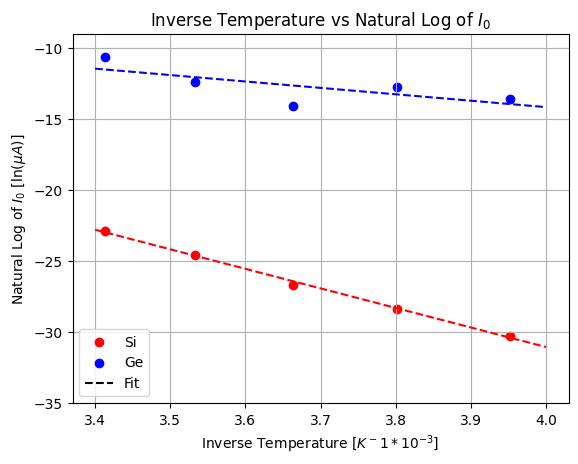

In [10]:
def lin(x,m,b):
    return m*x+b

p1, C1 = curve_fit(lin, x[0:5], y[0:5])
sigp = np.sqrt(np.diag(C1))
mSi = p1[0]
bSi = p1[1]

p2, C2 = curve_fit(lin, x[5:], y[5:])
sigp = np.sqrt(np.diag(C2))
mGe = p2[0]
bGe = p2[1]

fig, ax = plt.subplots()
ax.set(xlabel='Inverse Temperature [$K^-1 * 10^{-3}$]', ylabel='Natural Log of $I_0$ [$\ln(\mu A)$]',
       title='Inverse Temperature vs Natural Log of $I_0$')
ax.grid()
plt.scatter(x[0:5]*10**3,y[0:5], color='red',label='Si')
plt.scatter(x[5:]*10**3,y[5:], color='blue',label='Ge')
ran = np.arange(0.0034,0.004,0.0001)
plt.plot(ran*10**3,lin(ran,mSi,bSi), '--', color='red')
plt.plot(ran*10**3,lin(ran,mGe,bGe), '--', color='blue')


ax.axhline(-1,ls='--',color='k',label='Fit')

ax.legend()

plt.ylim(-35,-9)

plt.savefig("resultsA.png", format="png", dpi=1000)

In [11]:
k = cs.physical_constants['Boltzmann constant in eV/K'][0] #eV/K
print(-mSi*k)
print(-mGe*k)

1.1850430635153286
0.3888171534558576


In [12]:
print(odrSi20)
print(odrSi10)
print(odrSi0)
print(odrSi_10)
print(odrSi_20)

[array([1.17170711e-10, 2.93000000e+02]), array([4.29958559e-12, 0.00000000e+00])]
[array([2.07612736e-11, 2.83000000e+02]), array([1.03574751e-12, 0.00000000e+00])]
[array([2.56565552e-12, 2.73000000e+02]), array([9.51437613e-14, 0.00000000e+00])]
[array([4.88967341e-13, 2.63000000e+02]), array([1.70601216e-14, 0.00000000e+00])]
[array([7.07712573e-14, 2.53000000e+02]), array([3.83363396e-15, 0.00000000e+00])]


In [13]:
print(odrGe20)
print(odrGe10)
print(odrGe0)
print(odrGe_10)
print(odrGe_20)

[array([2.32299081e-05, 2.93000000e+02]), array([2.91129389e-06, 0.00000000e+00])]
[array([4.17718448e-06, 2.83000000e+02]), array([6.16567378e-07, 0.00000000e+00])]
[array([7.58642754e-07, 2.73000000e+02]), array([1.26842134e-07, 0.00000000e+00])]
[array([2.93872117e-06, 2.63000000e+02]), array([3.85129875e-07, 0.00000000e+00])]
[array([1.2092747e-06, 2.5300000e+02]), array([1.62625773e-07, 0.00000000e+00])]


In [14]:
# Alternative model, Non-ideal Diode

def current(beta, V):
    I_0,T,n = beta
    if n<1:
        n=1
    elif n>2:
        n=2
    q = cs.physical_constants['elementary charge'][0] #C
    k = cs.physical_constants['Boltzmann constant'][0] #J/K
    return I_0*(np.exp((q*V)/(n*k*T))-1)

In [15]:
def fit(dat,temp):
    data = RealData(dat[1], dat[0], sx= 0.01*dat[1], sy=0.05*dat[0])
    model = Model(current)

    odr = ODR(data,model, beta0=[10e-6, temp,1], ifixb=[1,0,1] )
    
    odr.set_job(fit_type=2)
    output1 = odr.run()
    
    odr.set_job(fit_type=0)
    output2 = odr.run()
    return [output1.beta,output1.sd_beta],[output2.beta,output2.sd_beta]

In [16]:

a,odrSi20 = fit(Si20,293)
a,odrSi10 = fit(Si10,283)
a,odrSi0 = fit(Si0,273)
a,odrSi_10 = fit(Si_10,263)
a,odrSi_20 = fit(Si_20,253)

a,odrGe20 = fit(Ge20,293)
a,odrGe10 = fit(Ge10,283)
a,odrGe0 = fit(Ge0,273)
a,odrGe_10 = fit(Ge_10,263)
a,odrGe_20 = fit(Ge_20,253)

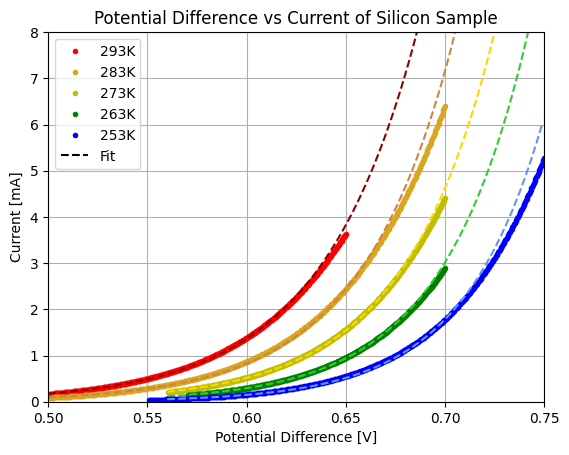

In [17]:
fig, ax = plt.subplots()
plt.plot(Si20[1],Si20[0],'r.',label='293K')
x = np.arange(0.5,0.75,0.001)
plt.plot(x,current(odrSi20[0],x),'--',color='darkred')

plt.plot(Si10[1],Si10[0],color='goldenrod',ls='',marker='.',label='283K')
x = np.arange(0.5,0.75,0.001)
plt.plot(x,current(odrSi10[0],x),'--', color='peru')

plt.plot(Si0[1],Si0[0],'y.',label='273K')
x = np.arange(0.56,0.75,0.001)
plt.plot(x,current(odrSi0[0],x),'--', color='gold')

plt.plot(Si_10[1],Si_10[0],'g.',label='263K')
x = np.arange(0.56,0.75,0.001)
plt.plot(x,current(odrSi_10[0],x),'--', color='limegreen')

plt.plot(Si_20[1],Si_20[0],'b.',label='253K')
x = np.arange(0.56,0.75,0.001)
plt.plot(x,current(odrSi_20[0],x),'--', color='cornflowerblue')

ax.axhline(-1,ls='--',color='k',label='Fit')

ax.set(xlabel='Potential Difference [V]', ylabel='Current [mA]',
       title='Potential Difference vs Current of Silicon Sample')
ax.grid()
ax.legend()

plt.xlim(0.5,0.75)
plt.ylim(0,8)
plt.savefig("SI_ivB.png", format="png", dpi=1000)

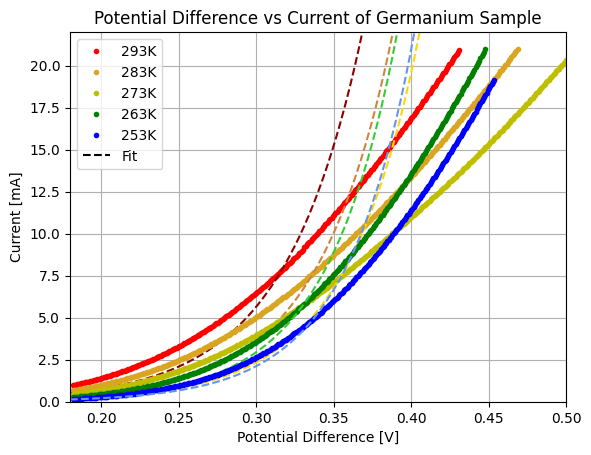

In [18]:

fig, ax = plt.subplots()
ax.set(xlabel='Potential Difference [V]', ylabel='Current [mA]',
       title='Potential Difference vs Current of Germanium Sample')
ax.grid()

plt.plot(Ge20[1],Ge20[0],'r.',label='293K')
x = np.arange(0.18,0.4,0.001)
plt.plot(x,current(odrGe20[0],x),'--',color='darkred')

plt.plot(Ge10[1],Ge10[0],color='goldenrod',marker='.',ls='',label='283K')
x = np.arange(0.18,0.4,0.001)
plt.plot(x,current(odrGe10[0],x),'--', color='peru')

plt.plot(Ge0[1],Ge0[0],'y.',label='273K')
x = np.arange(0.18,0.41,0.001)
plt.plot(x,current(odrGe0[0],x),'--', color='gold')

plt.plot(Ge_10[1],Ge_10[0],'g.',label='263K')
x = np.arange(0.18,0.4,0.001)
plt.plot(x,current(odrGe_10[0],x),'--', color='limegreen')

plt.plot(Ge_20[1],Ge_20[0],'b.',label='253K')
x = np.arange(0.18,0.45,0.001)
plt.plot(x,current(odrGe_20[0],x),'--', color='cornflowerblue')

ax.axhline(-1,ls='--',color='k',label='Fit')

ax.legend()
plt.xlim(0.18,0.5)
plt.ylim(0,22)
plt.savefig("Ge_ivB.png", format="png", dpi=1000)

In [19]:
I_0 = np.array([odrSi20[0][0],odrSi10[0][0],odrSi0[0][0],
               odrSi_10[0][0],odrSi_20[0][0],odrGe20[0][0],
               odrGe10[0][0],odrGe0[0][0],odrGe_10[0][0],odrGe_20[0][0]])

x = 1/np.array([293,283,273,263,253,293,283,273,263,253])
y = np.log(I_0)


In [20]:
def lin(x,m,b):
    return m*x+b

p1, C1 = curve_fit(lin, x[0:5], y[0:5])
sigp = np.sqrt(np.diag(C1))
mSi = p1[0]
bSi = p1[1]

p2, C2 = curve_fit(lin, x[6:], y[6:])
sigp = np.sqrt(np.diag(C2))
mGe = p2[0]
bGe = p2[1]



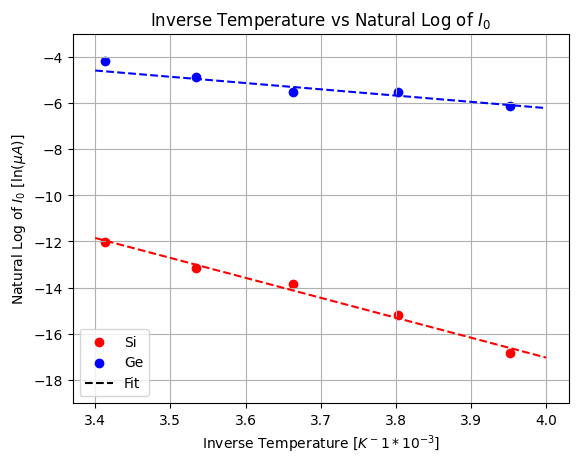

In [21]:
fig, ax = plt.subplots()
ax.set(xlabel='Inverse Temperature [$K^-1 * 10^{-3}$]', ylabel='Natural Log of $I_0$ [$\ln(\mu A)$]',
       title='Inverse Temperature vs Natural Log of $I_0$')
ax.grid()

plt.scatter(x[0:5]*10**3,y[0:5], color='red',label='Si')
plt.scatter(x[5:]*10**3,y[5:], color='blue',label='Ge')
ran = np.arange(0.0034,0.004,0.0001)
plt.plot(ran*10**3,lin(ran,mSi,bSi), '--', color='red')
plt.plot(ran*10**3,lin(ran,mGe,bGe), '--', color='blue')

ax.axhline(-1,ls='--',color='k',label='Fit')

ax.legend()

plt.ylim(-19,-3)


plt.savefig("resultsB.png", format="png", dpi=1000)

In [22]:
k = cs.physical_constants['Boltzmann constant in eV/K'][0] #eV/K
print(-mSi*k)
print(-mGe*k)


0.7438607710970757
0.2337537909371889


In [23]:
print(odrSi20)
print(odrSi10)
print(odrSi0)
print(odrSi_10)
print(odrSi_20)

[array([5.87535187e-06, 2.93000000e+02, 1.92329602e+00]), array([7.55857339e-08, 0.00000000e+00, 2.10277218e-03])]
[array([1.95985737e-06, 2.83000000e+02, 1.89954859e+00]), array([4.15758886e-08, 0.00000000e+00, 3.14522976e-03])]
[array([9.89146578e-07, 2.73000000e+02, 1.93753565e+00]), array([1.33459802e-08, 0.00000000e+00, 1.90045595e-03])]
[array([2.49476664e-07, 2.63000000e+02, 1.89404042e+00]), array([3.86365002e-09, 0.00000000e+00, 1.99107028e-03])]
[array([5.00184895e-08, 2.53000000e+02, 1.84650333e+00]), array([1.73193436e-09, 0.00000000e+00, 3.99926878e-03])]


In [24]:
print(odrGe20)
print(odrGe10)
print(odrGe0)
print(odrGe_10)
print(odrGe_20)

[array([1.48766800e-02, 2.93000000e+02, 2.23688292e+00]), array([0.00048739, 0.        , 0.        ])]
[array([7.66968584e-03, 2.83000000e+02, 2.06821245e+00]), array([0.00031183, 0.        , 0.        ])]
[array([3.97384254e-03, 2.73000000e+02, 2.08518145e+00]), array([0.00018904, 0.        , 0.        ])]
[array([3.93311134e-03, 2.63000000e+02, 2.01735857e+00]), array([0.00010133, 0.        , 0.        ])]
[array([2.17177418e-03, 2.53000000e+02, 2.02185332e+00]), array([5.25020526e-05, 0.00000000e+00, 0.00000000e+00])]
